In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [26]:
X_train, X_test = X_train/255., X_test/255.

In [41]:
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(50, return_sequences=True, input_shape=X_train[0].shape),
  tf.keras.layers.LSTM(10),
  tf.keras.layers.Dense(10, activation='softmax')
])

early_stopper = tf.keras.callbacks.EarlyStopping(patience=10)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

batch_size = 32
epochs = 10
history = model.fit(X_train, Y_train,validation_split=0.2, epochs=epochs)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.7180 - accuracy: 0.7959 - val_loss: 0.3013 - val_accuracy: 0.9237
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2302 - accuracy: 0.9384 - val_loss: 0.1734 - val_accuracy: 0.9542
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1447 - accuracy: 0.9617 - val_loss: 0.1103 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1082 - accuracy: 0.9703 - val_loss: 0.0939 - val_accuracy: 0.9742
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0839 - accuracy: 0.9767 - val_loss: 0.0861 - val_accuracy: 0.9764
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0732 - accuracy: 0.9796 - val_loss: 0.0753 - val_accuracy: 0.9787
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0615 - accuracy: 0.9825 - val_loss: 0.0717 - val_accuracy

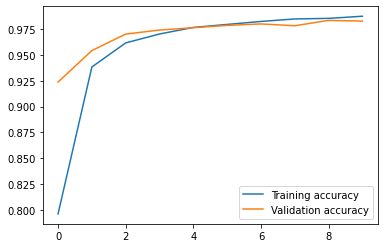

In [42]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.show()

In [43]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

Accuracy: 98.15%


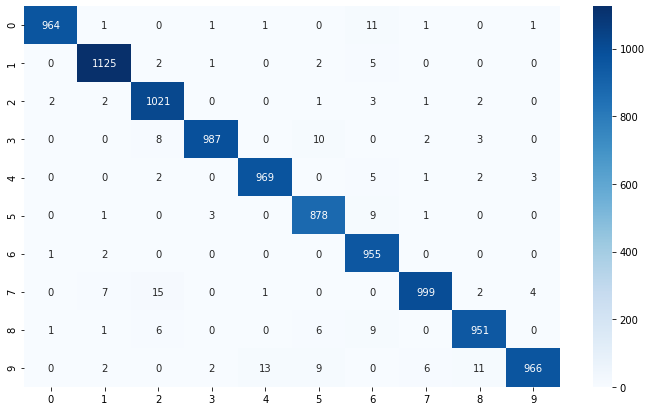

In [44]:
cf = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(12, 7))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')

accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

In [38]:
model = tf.keras.Sequenti
al([
  tf.keras.layers.GRU(50,return_sequences=True, input_shape=X_train[0].shape),
  tf.keras.layers.GRU(10),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

epochs=10
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6919 - accuracy: 0.7999 - val_loss: 0.2556 - val_accuracy: 0.9351
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2003 - accuracy: 0.9464 - val_loss: 0.1396 - val_accuracy: 0.9624
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1336 - accuracy: 0.9634 - val_loss: 0.1100 - val_accuracy: 0.9704
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1033 - accuracy: 0.9714 - val_loss: 0.0897 - val_accuracy: 0.9761
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0855 - accuracy: 0.9762 - val_loss: 0.0841 - val_accuracy: 0.9782
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0716 - accuracy: 0.9795 - val_loss: 0.0841 - val_accuracy: 0.9780
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0635 - accuracy: 0.9821 - val_loss: 0.0751 - val_accuracy

In [39]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

Accuracy: 98.16%


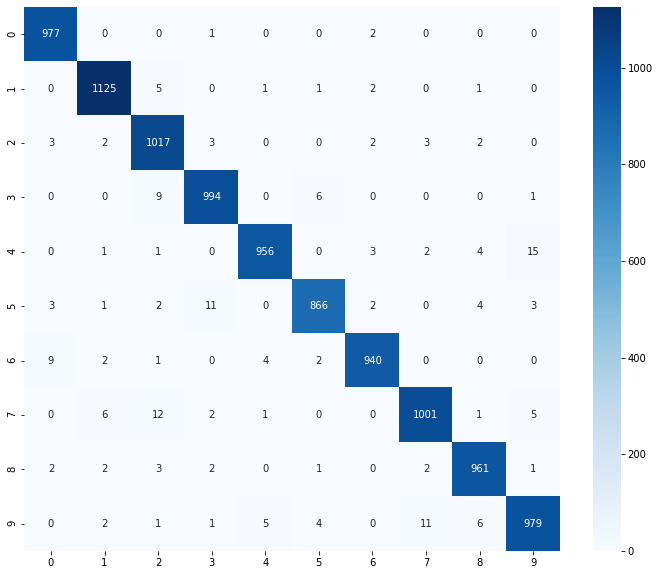

In [40]:
cf = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(12,10))
sns.heatmap(cf, fmt='d', annot=True, cmap='Blues')

accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")